In [24]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

# My data set
My project was created, among other things, to help waiters, thanks to it they can roughly estimate how much tip they will receive from a particular order.
I added two new columns to the dataset. The first shows what percentage of the bill was left as a tip.
The second shows the average tip per person served.

    

In [25]:
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
268,25.12,6.54,Female,No,Sun,Lunch,2
269,24.08,3.92,Male,No,Thur,Dinner,4
270,26.27,6.50,Female,Yes,Sat,Lunch,2
271,41.21,8.90,Female,Yes,Thur,Lunch,2


# Data transformation
At this stage I convert data from dollars to rubles using the current exchange rate

In [26]:
def cur_cnvrt_USD_to_RUB():
    d = requests.get("https://www.cbr-xml-daily.ru/latest.js")
    d = json.loads(d.content)
    cur_RUB = 1 / d['rates']["USD"]
    return int(cur_RUB)


df["total_bill"] = df["total_bill"] * cur_cnvrt_USD_to_RUB()
df["tip"] = df["tip"] * cur_cnvrt_USD_to_RUB()
df["tip_%_bill"] = (df["tip"] * 100) / df["total_bill"]
df["tip_per_person"] = df["tip"] / df["size"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_%_bill,tip_per_person
0,1546.09,91.91,Female,No,Sun,Dinner,2,5.944673,45.955000
1,940.94,151.06,Male,No,Sun,Dinner,3,16.054159,50.353333
2,1911.91,318.50,Male,No,Sun,Dinner,3,16.658734,106.166667
3,2154.88,301.21,Male,No,Sun,Dinner,2,13.978041,150.605000
4,2237.69,328.51,Female,No,Sun,Dinner,4,14.680765,82.127500


# Data cleanup
At this stage I check if there are none values in my data set.

In [48]:
if df.isnull().values.any():
    print("There are NaNs in dataset.")
else:
    print("There is no NaNs in dataset")
print("rows with NaN:")
print(df[df.isnull().any(axis=1)].index.values)
print("columns with NaN:")
print(df.columns[df.isnull().any()].values)

There is no NaNs in dataset
rows with NaN:
[]
columns with NaN:
[]


# Descriptive statistics

In [27]:
df.describe()

,total_bill,tip,size,tip_%_bill,tip_per_person
count,273.000000,273.000000,273.000000,273.000000,273.000000
mean,1792.153333,273.766667,2.564103,16.113161,111.693222
std,810.637692,134.788510,0.937629,6.431299,53.409435
min,279.370000,36.400000,1.000000,3.563814,18.200000
25%,1208.480000,182.000000,2.000000,12.824370,77.805000
50%,1593.410000,249.340000,2.000000,15.384615,95.550000
75%,2191.280000,327.600000,3.000000,19.120459,136.500000
max,4623.710000,910.000000,6.000000,71.034483,409.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      273 non-null    float64
 1   tip             273 non-null    float64
 2   sex             273 non-null    object 
 3   smoker          273 non-null    object 
 4   day             273 non-null    object 
 5   time            273 non-null    object 
 6   size            273 non-null    int64  
 7   tip_%_bill      273 non-null    float64
 8   tip_per_person  273 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 19.3+ KB


At this stage I display a table with the average, minimum, maximum and median values of all numerical indicators in my dataset
in cases where a woman paid the bill

In [29]:
df1 = df.loc[df["sex"] == "Female"]

x = [['median', df1['total_bill'].median(), df1['tip'].median(), df1['tip_%_bill'].median(),
      df1['tip_per_person'].median()],
     ['mean', df1['total_bill'].mean(), df1['tip'].mean(), df1['tip_%_bill'].mean(), df1['tip_per_person'].mean()],
     ['max', df1['total_bill'].max(), df1['tip'].max(), df1['tip_%_bill'].max(), df1['tip_per_person'].max()],
     ['min', df1['total_bill'].min(), df1['tip'].min(), df1['tip_%_bill'].min(), df1['tip_per_person'].min()]]
pd.DataFrame(x, columns=['name', 'bill', 'tip', 'tip%', 'tip_per_person'])

,name,bill,tip,tip%,tip_per_person
0,median,1492.400000,237.51000,15.384615,101.465000
1,mean,1698.262222,269.31404,16.548686,114.007833
2,max,4146.870000,809.90000,41.666667,404.950000
3,min,279.370000,91.00000,5.679667,41.253333


At this stage I display a table with the average, minimum, maximum and median values of all numerical indicators in my dataset
in cases where a man paid the bill

In [30]:
df2 = df.loc[df["sex"] == "Male"]

x = [['median', df2['total_bill'].median(), df2['tip'].median(), df2['tip_%_bill'].median(),
      df2['tip_per_person'].median()],
     ['mean', df2['total_bill'].mean(), df2['tip'].mean(), df2['tip_%_bill'].mean(), df2['tip_per_person'].mean()],
     ['max', df2['total_bill'].max(), df2['tip'].max(), df2['tip_%_bill'].max(), df2['tip_per_person'].max()],
     ['min', df2['total_bill'].min(), df2['tip'].min(), df2['tip_%_bill'].min(), df2['tip_per_person'].min()]]
pd.DataFrame(x, columns=['name', 'bill', 'tip', 'tip%', 'tip_per_person'])

,name,bill,tip,tip%,tip_per_person
0,median,1663.935000,261.170000,15.390646,92.365000
1,mean,1845.574138,276.300057,15.865363,110.376288
2,max,4623.710000,910.000000,71.034483,409.500000
3,min,659.750000,36.400000,3.563814,18.200000


# Overview (plots)
In this graph you can see how much a tip is left depending on the size of the bill. The blue line indicates the indicators for men, the pink line for women.
For clarity, I also added a green dotted line to each graph, which shows the average value.

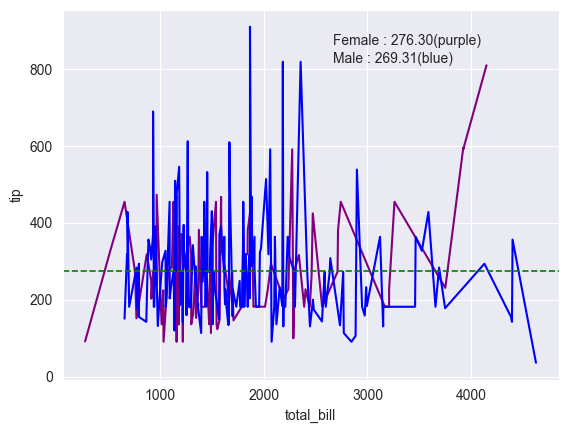

In [31]:
st1 = df.loc[df["sex"] == "Female"]
st = st1.sort_values(by=["total_bill", "tip", "tip_%_bill", "tip_per_person"], ascending=True)
st2 = df.loc[df["sex"] == "Male"]
stI = st2.sort_values(by=["total_bill", "tip", "tip_%_bill", "tip_per_person"], ascending=True)

plt.plot(st["total_bill"], st1["tip"], color='purple')
plt.plot(stI["total_bill"], st2["tip"], color='blue')
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.axhline(y=df['tip'].mean(), color='green', linestyle='--', linewidth=1.2)

k1 = str(st1['tip'].mean())
k2 = str(st2['tip'].mean())

plt.subplot(15, 2, 4)
plt.axis(False)
plt.text(0, 0.5, 'Female : ' + k2[:6] + '(purple)')
plt.subplot(10, 2, 4)
plt.axis(False)
plt.text(0, 0.5, 'Male : ' + k1[:6] + '(blue)')
plt.show()

The bar chart I built at this stage shows the average percentage of the bill left as a tip to the waiter, depending on the day of the week.
The pink line running on top helps to track the dynamics of the percentage change

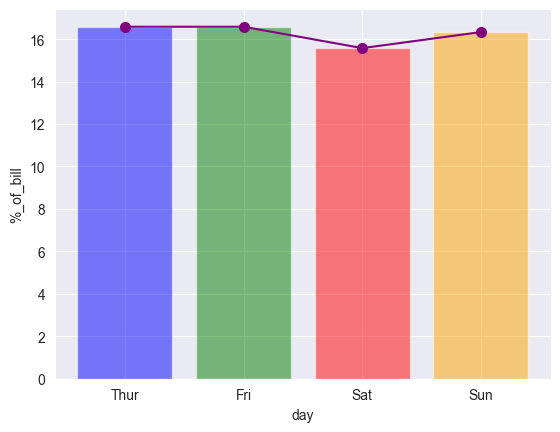

In [32]:
st1 = df.loc[df["day"] == "Sat"]
st2 = df.loc[df["day"] == "Sun"]
st3 = df.loc[df["day"] == "Thur"]
st4 = df.loc[df["day"] == "Fri"]

a1 = st1["tip_%_bill"].mean()
a2 = st2["tip_%_bill"].mean()
a3 = st3["tip_%_bill"].mean()
a4 = st3["tip_%_bill"].mean()

x = ['Thur', 'Fri', 'Sat', 'Sun']
y = [a3, a4, a1, a2]

plt.bar(x, y, alpha=0.5, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('day')
plt.plot(x, y, color='purple', marker='o', markersize=7)
plt.ylabel('%_of_bill')
plt.show()

These two bar charts show how many tips, in percentage terms, relative to the order amount, on average,
are left by women and men at different times on different days of the week. For clarity,
I also added a green dotted line to each graph, which shows the average value.

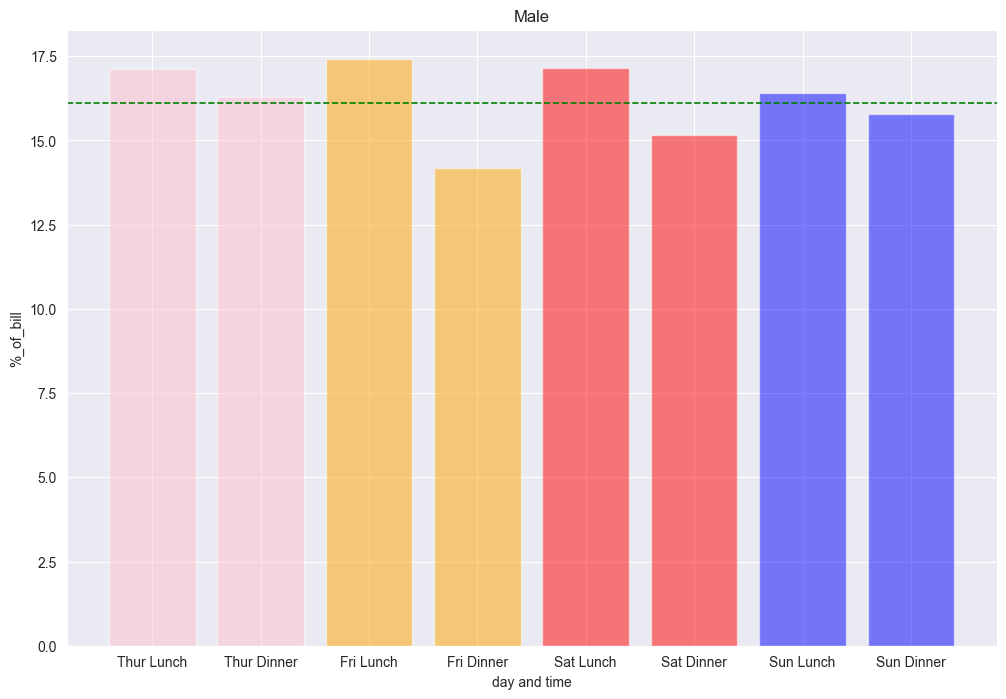

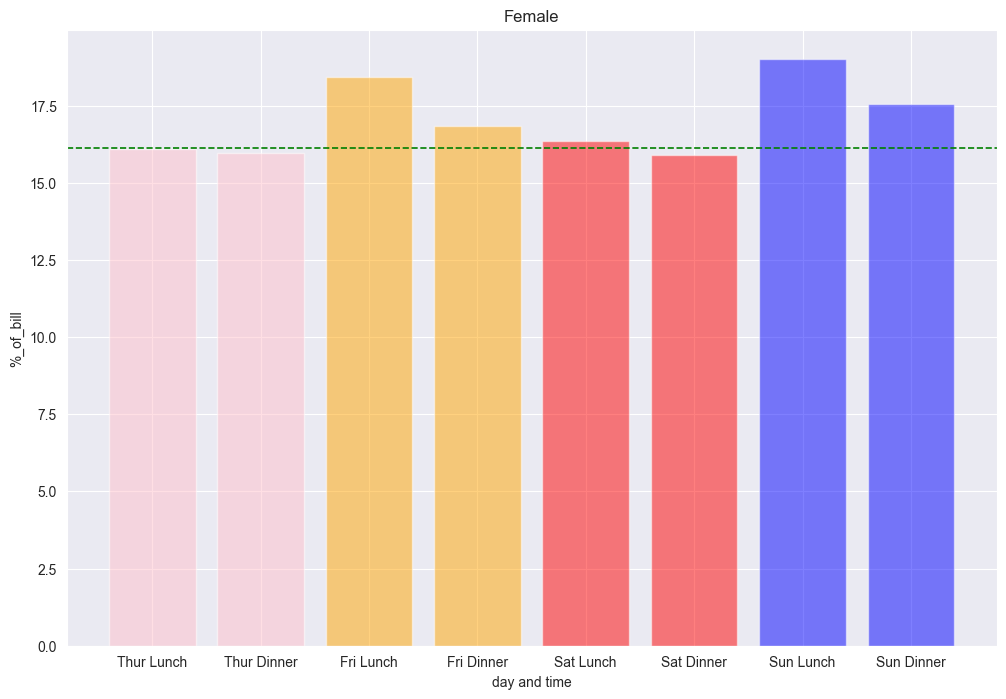

In [33]:
mal = df.loc[df["sex"] == "Male"]
st1 = mal.loc[df["day"] == "Thur"]
st2 = mal.loc[df["day"] == "Fri"]
st3 = mal.loc[df["day"] == "Sat"]
st4 = mal.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha=0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y=df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Male')
plt.show()

fem = df.loc[df["sex"] == "Female"]
st1 = fem.loc[df["day"] == "Thur"]
st2 = fem.loc[df["day"] == "Fri"]
st3 = fem.loc[df["day"] == "Sat"]
st4 = fem.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha=0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y=df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Female')
plt.show()

The pie chart below shows what portion of all bills in the dataset was paid by men, and how much by women.
The second diagram shows the same thing but for tips

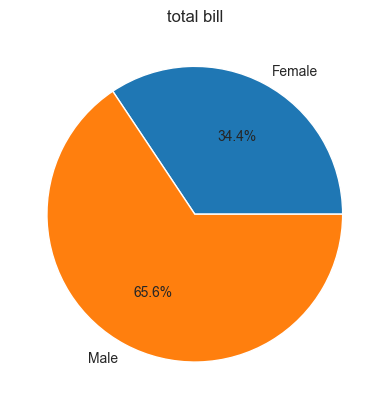

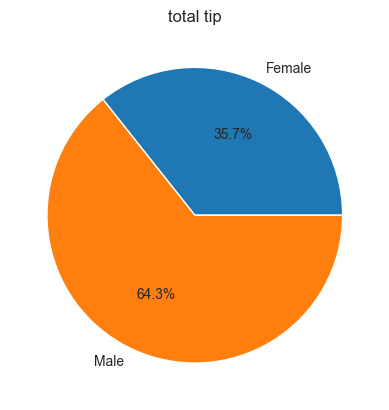

In [34]:
st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

a1 = int(st1["total_bill"].sum())
a2 = int(st2["total_bill"].sum())

total = a1 + a2
a1 = (a1 / total) * 100
a2 = (a2 / total) * 100
vals = [a1, a2]
labels = ["Female", "Male"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total bill")
plt.show()

b1 = int(st1["tip"].sum())
b2 = int(st2["tip"].sum())

total2 = b1 + b2
b1 = (b1 / total2) * 100
b2 = (b2 / total2) * 100
vals = [b1, b2]
labels = ["Female", "Male"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total tip")
plt.show()

The pie chart below shows what portion of the total of all bills in the dataset is for dinners, and how much is for lunches.
The second diagram shows the same thing but for tips

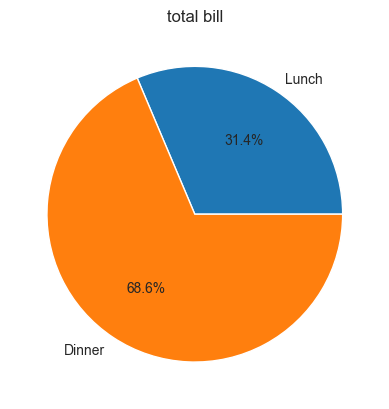

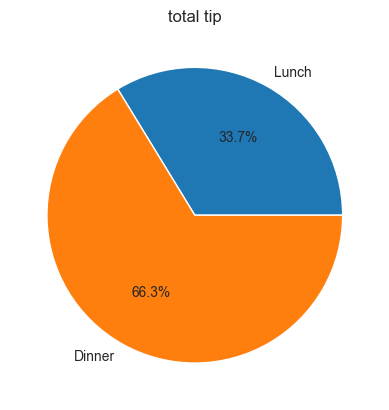

In [35]:
st1 = df.loc[df["time"] == "Lunch"]
st2 = df.loc[df["time"] == "Dinner"]

a1 = int(st1["total_bill"].sum())
a2 = int(st2["total_bill"].sum())

total = a1 + a2
a1 = (a1 / total) * 100
a2 = (a2 / total) * 100
vals = [a1, a2]
labels = ["Lunch", "Dinner"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total bill")
plt.show()

b1 = int(st1["tip"].sum())
b2 = int(st2["tip"].sum())

total2 = b1 + b2
b1 = (b1 / total2) * 100
b2 = (b2 / total2) * 100
vals = [b1, b2]
labels = ["Lunch", "Dinner"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total tip")
plt.show()

Below, it is fashionable to observe the two graphs I have built, which show how many tips there are on average per person at the table.
One graph refers to companies where a man paid for the bill, the second one refers to those companies where money was paid

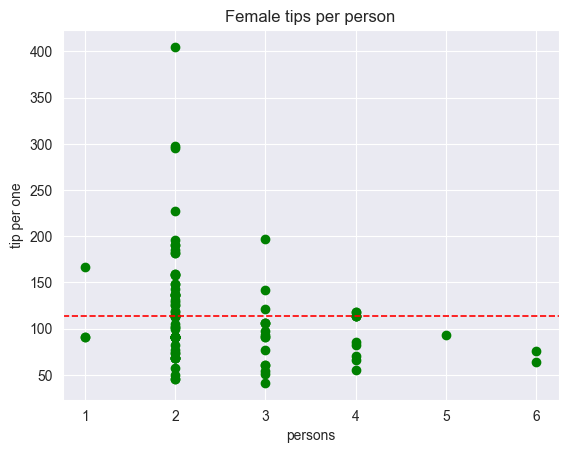

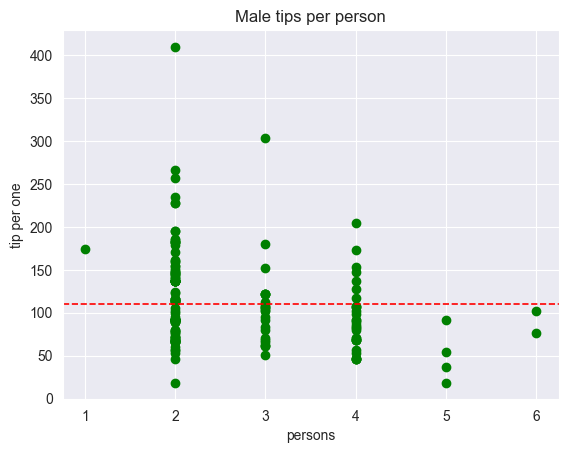

In [36]:
st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

y = st1["tip_per_person"]
x = st1["size"]

plt.axhline(y=st1['tip_per_person'].mean(), color='red', linestyle='--', linewidth=1.2)
plt.xlabel('persons')
plt.ylabel('tip per one')
plt.scatter(x, y, color=['green'])
plt.title('Female tips per person')
plt.show()

y = st2["tip_per_person"]
x = st2["size"]

plt.scatter(x, y, color=['green'])
plt.xlabel('persons')
plt.ylabel('tip per one')
plt.axhline(y=st2['tip_per_person'].mean(), color='red', linestyle='--', linewidth=1.2)
plt.title('Male tips per person')
plt.savefig('rebrov.png')
plt.show()

# More detailed overview
At this stage, I have built a three-dimensional graph that shows very well the dependence of tips on the total bill and the number of tips.
I also marked the companies with different colors, where a man and a woman paid for the bill.

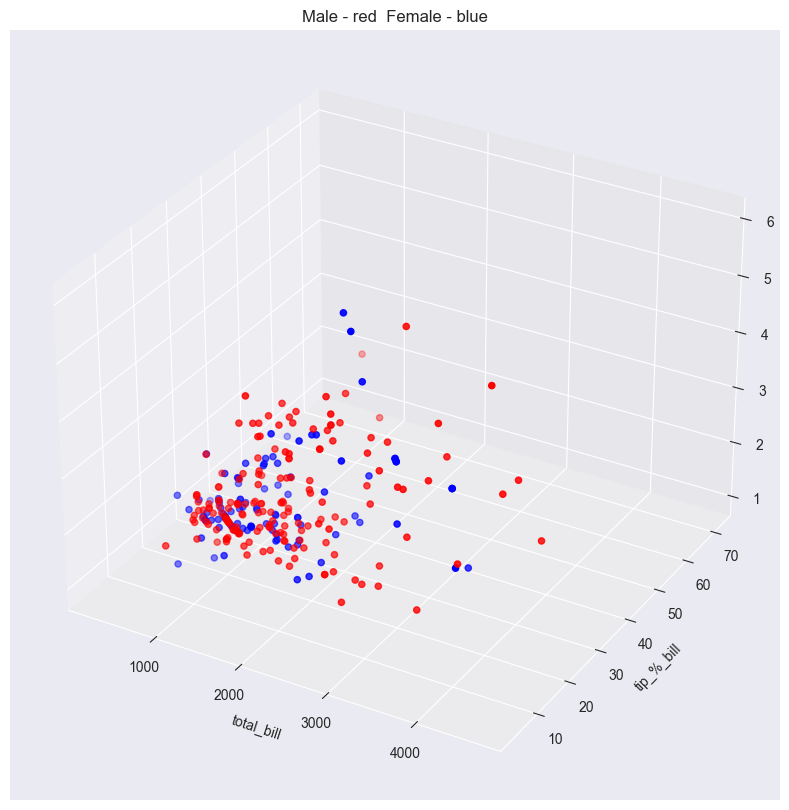

<Figure size 1200x1200 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(100, 10))
ax = fig.add_subplot(111, projection='3d')

st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]
x = st2["total_bill"]
y = st2['tip_%_bill']
z = st2["size"]

plt.figure(figsize=(12, 12))
ax.scatter(x, y, z, color='red')

x = st1["total_bill"]
y = st1['tip_%_bill']
z = st1["size"]

ax.scatter(x, y, z, color='blue')
ax.set_xlabel("total_bill")
ax.set_ylabel('tip_%_bill')
ax.set_title('Male - red  Female - blue')
plt.show()

The graphs below show the correlation between the tip percentage of the total bill and the bill amount itself

                total_bill  tip_%_bill  tip_per_person
total_bill        1.000000   -0.288346        0.323381
tip_%_bill       -0.288346    1.000000        0.538776
tip_per_person    0.323381    0.538776        1.000000


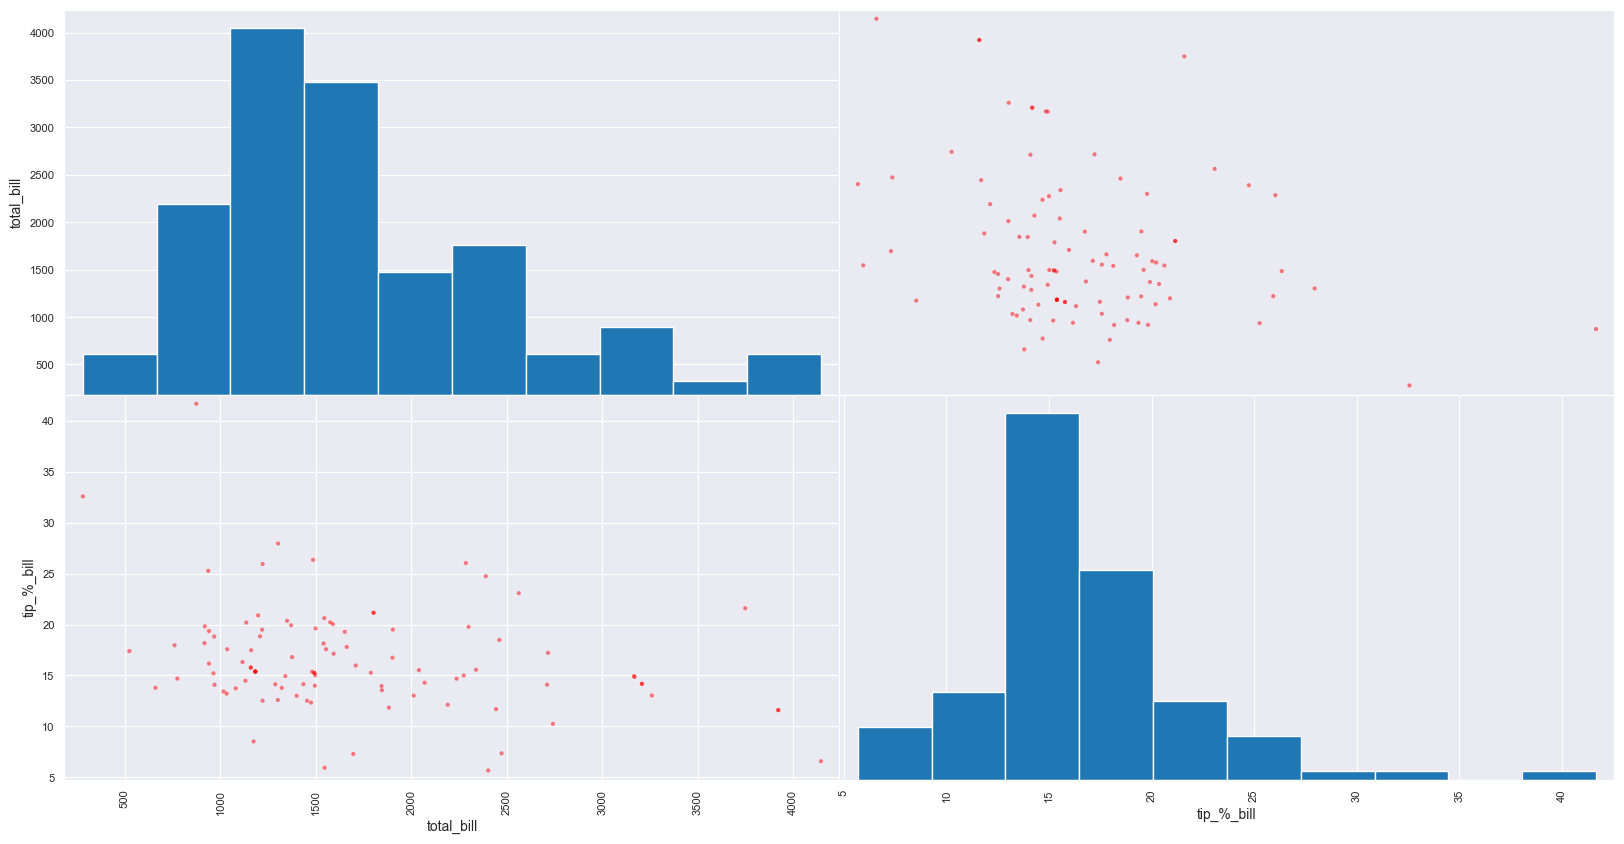

                total_bill  tip_%_bill  tip_per_person
total_bill        1.000000   -0.287185        0.241511
tip_%_bill       -0.287185    1.000000        0.622542
tip_per_person    0.241511    0.622542        1.000000


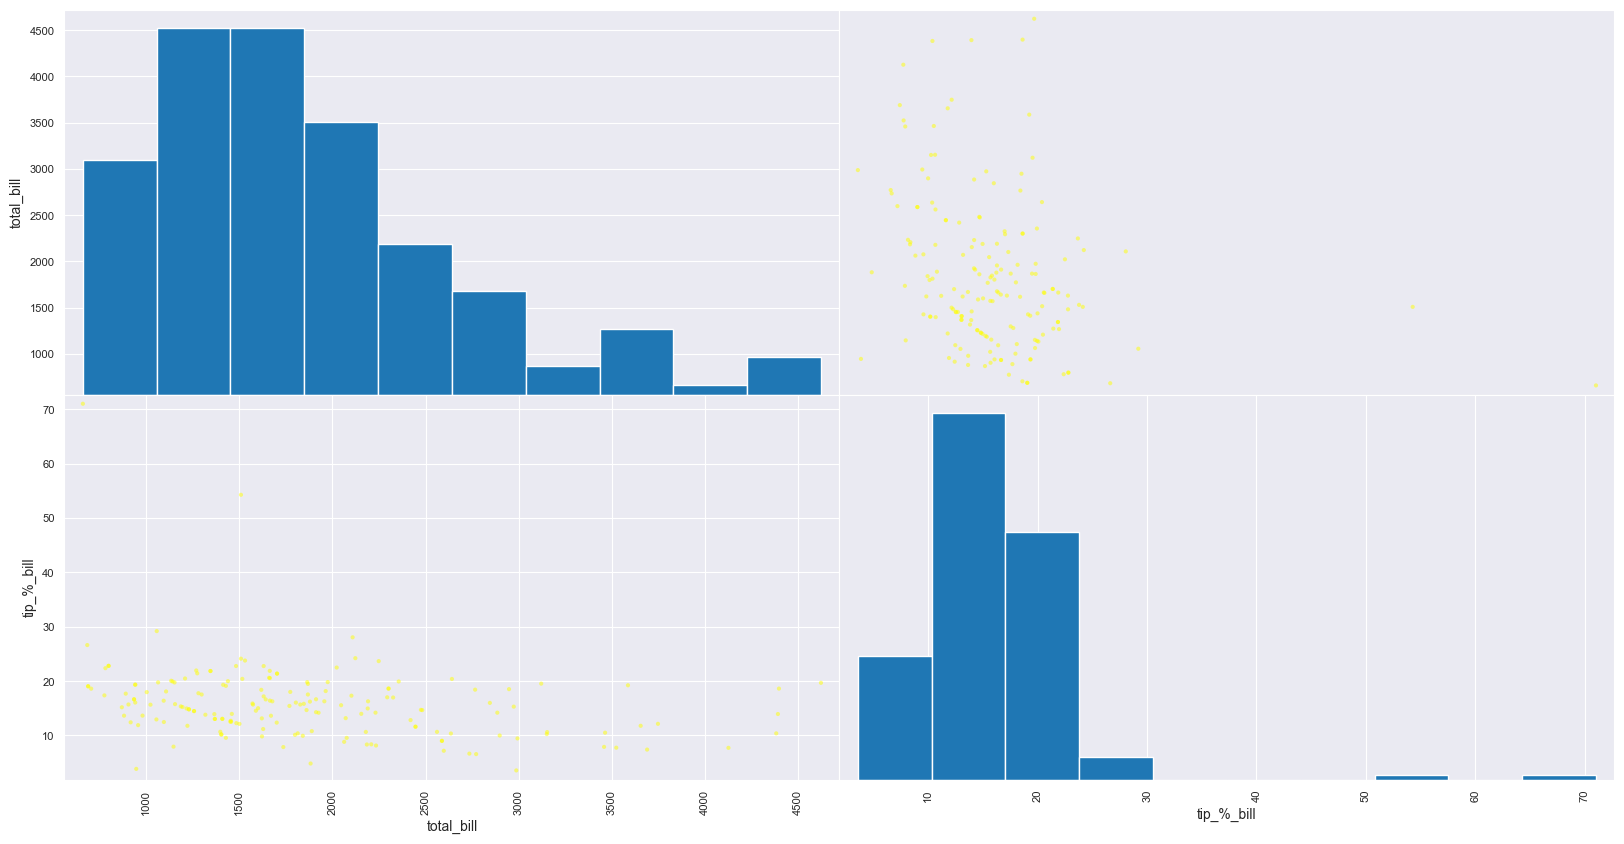

In [38]:
st1 = df.loc[df["sex"] == "Female"]
st2 = df.loc[df["sex"] == "Male"]

st1[["total_bill", 'tip_%_bill', 'tip_per_person']].corr()
print(st1[["total_bill", 'tip_%_bill', 'tip_per_person']].corr())

pd.plotting.scatter_matrix(pd.DataFrame(data=st1, columns=["total_bill", 'tip_%_bill']), figsize=(20, 10), color='red')
plt.show()

st2[["total_bill", 'tip_%_bill', 'tip_per_person']].corr()
print(st2[["total_bill", 'tip_%_bill', 'tip_per_person']].corr())

pd.plotting.scatter_matrix(pd.DataFrame(data=st2, columns=["total_bill", 'tip_%_bill']), figsize=(20, 10),
                           color='yellow')
plt.show()

# Hypothesis
My hypothesis is that it is most profitable for a waiter to work on Sunday and serve women, 
This hypothesis can be confirmed by the following graphs. 

#### Result
The information on them allows us to conclude that tips
from women on Sunday are above average and can only be compared with tips from men during lunches,
however, thanks to the pie chart, we see that lunches account for about a third of the total amount of orders and tips.


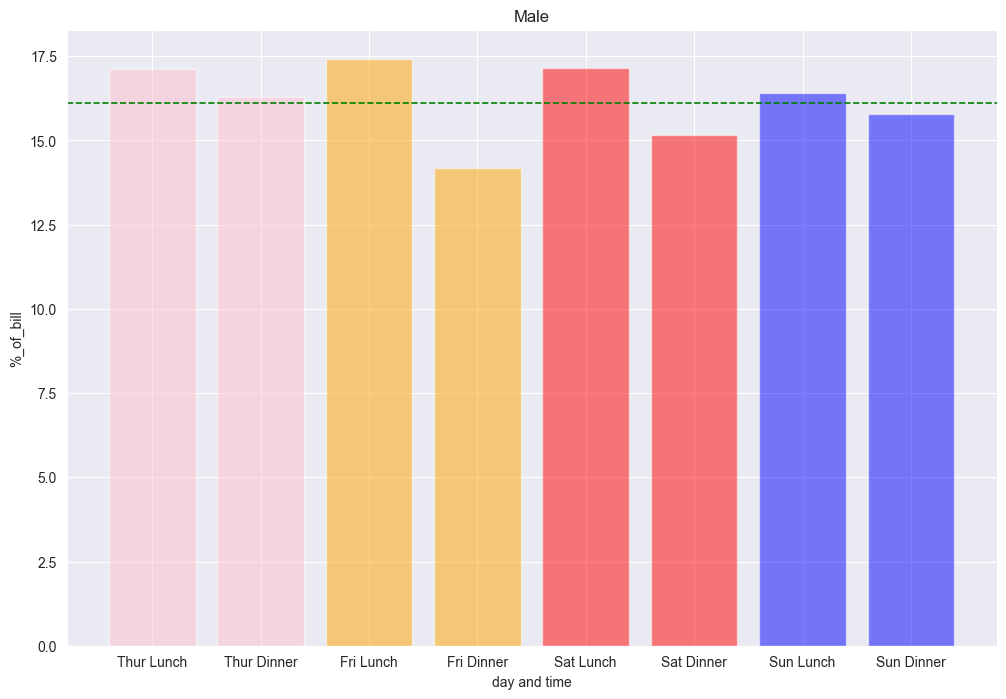

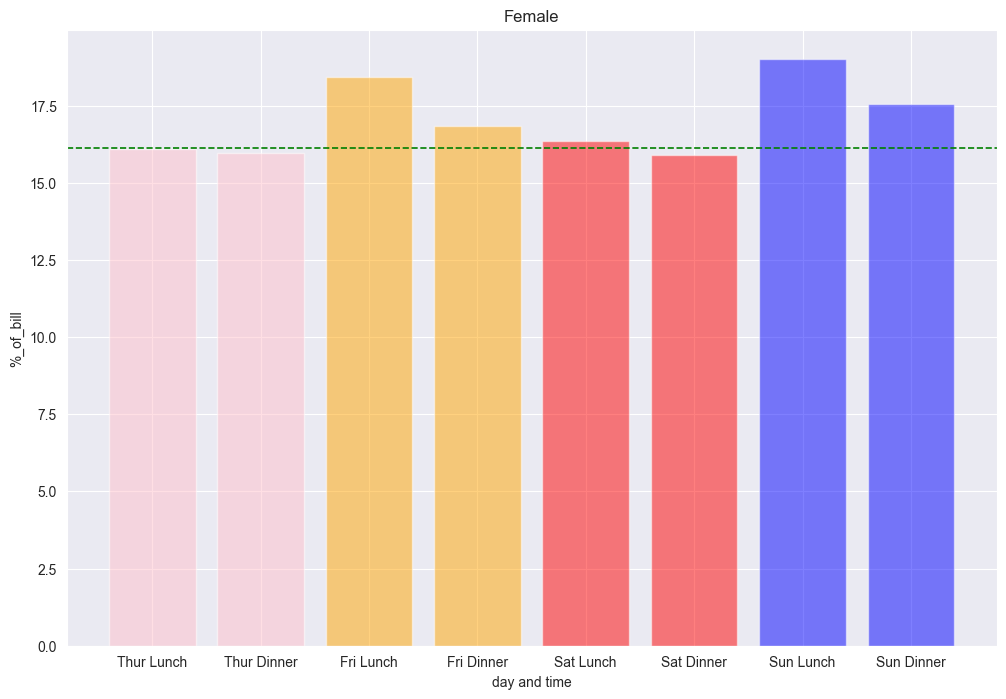

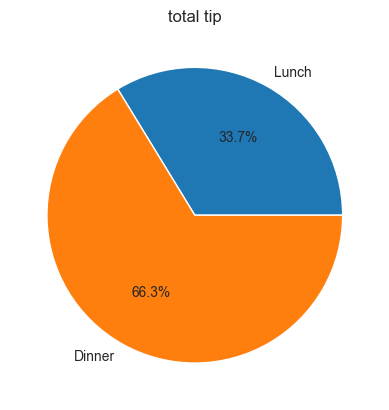

In [39]:
mal = df.loc[df["sex"] == "Male"]
st1 = mal.loc[df["day"] == "Thur"]
st2 = mal.loc[df["day"] == "Fri"]
st3 = mal.loc[df["day"] == "Sat"]
st4 = mal.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha=0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y=df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Male')
plt.show()

fem = df.loc[df["sex"] == "Female"]
st1 = fem.loc[df["day"] == "Thur"]
st2 = fem.loc[df["day"] == "Fri"]
st3 = fem.loc[df["day"] == "Sat"]
st4 = fem.loc[df["day"] == "Sun"]

st11 = st1.loc[df["time"] == "Lunch"]
st12 = st1.loc[df["time"] == "Dinner"]
st21 = st2.loc[df["time"] == "Lunch"]
st22 = st2.loc[df["time"] == "Dinner"]
st31 = st3.loc[df["time"] == "Lunch"]
st32 = st3.loc[df["time"] == "Dinner"]
st41 = st4.loc[df["time"] == "Lunch"]
st42 = st4.loc[df["time"] == "Dinner"]

a11 = st11["tip_%_bill"].mean()
a12 = st12["tip_%_bill"].mean()
a21 = st21["tip_%_bill"].mean()
a22 = st22["tip_%_bill"].mean()
a31 = st31["tip_%_bill"].mean()
a32 = st32["tip_%_bill"].mean()
a41 = st41["tip_%_bill"].mean()
a42 = st42["tip_%_bill"].mean()

x = ['Thur Lunch', 'Thur Dinner', 'Fri Lunch', 'Fri Dinner', 'Sat Lunch', 'Sat Dinner', 'Sun Lunch', 'Sun Dinner']
y = [a11, a12, a21, a22, a31, a32, a41, a42]
plt.figure(figsize=(12, 8))
plt.bar(x, y, alpha=0.5, color=['pink', 'pink', 'orange', 'orange', 'red', 'red', 'blue', 'blue'])
plt.axhline(y=df["tip_%_bill"].mean(), color='green', linestyle='--', linewidth=1.2)
plt.xlabel('day and time')
plt.ylabel('%_of_bill')
plt.title('Female')
plt.show()

st1 = df.loc[df["time"] == "Lunch"]
st2 = df.loc[df["time"] == "Dinner"]

b1 = int(st1["tip"].sum())
b2 = int(st2["tip"].sum())

total2 = b1 + b2
b1 = (b1 / total2) * 100
b2 = (b2 / total2) * 100
vals = [b1, b2]
labels = ["Lunch", "Dinner"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("total tip")
plt.show()